In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
datos=load_iris()

In [3]:
X=datos.data

In [4]:
y=datos.target

In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [6]:
X=minmax.fit_transform(X)

In [ ]:
#FKM FM YYT

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,stratify=y)

In [15]:
import numpy as np
unicos=np.unique(y)
min=unicos.shape[0]
max=6
print(min)

3


In [16]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
resultados=pd.DataFrame(columns=["means","aciertos entrena","aciertos test"])

In [17]:
for i,k in enumerate(range(min,max)):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train,y_train)
    moda=np.zeros(k)
    for j in range(k):
        similares=(kmeans.labels_==j)
        argwhere=np.argwhere(similares)
        train_enc=y_train[argwhere]
        moda[j]=mode(train_enc)[0]
    y_train_pred=moda[kmeans.predict(X_train)]
    y_test_pred=moda[kmeans.predict(X_test)]
    resultados.loc[i]=[k,accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)]
    


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_13120\159787410.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda[j]=mode(train_enc)[0]
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` e

In [18]:
resultados

,means,aciertos entrena,aciertos test
0,3.0,0.87,0.94
1,4.0,0.88,0.90
2,5.0,0.90,0.90


In [19]:
import matplotlib.pyplot as plt


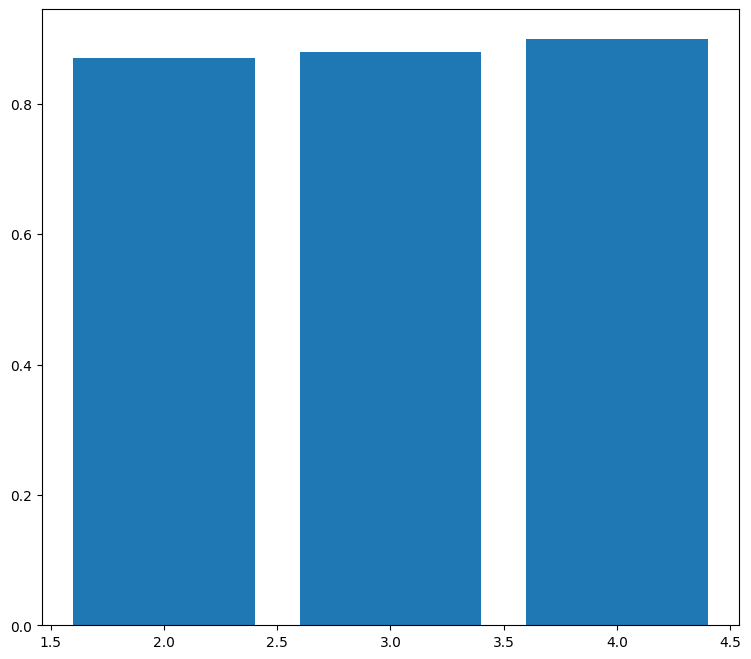

In [22]:
plt.figure(figsize=(9,8))
plt.bar(np.arange(2,5),resultados["aciertos entrena"])
plt.show()